In [64]:
# sum of squares for error, SSE

import numpy as np
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [65]:
# label's value is 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 2 is the highest possibility of softmax function
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print('predict label is 2')
print(sum_squares_error(np.array(y), np.array(t)))

# 9 is the highest possibility of softmax function
y = [0.01, 0.02, 0.03, 0.04, 0.02, 0.1, 0.0, 0.0, 0.0, 0.8]
print('predict label is 9')
print(sum_squares_error(np.array(y), np.array(t)))

predict label is 2
0.09750000000000003
predict label is 9
0.7967


In [66]:
# cross entropy error, CEE
# if y=0 np.log(y) go to -inf so we need to add a little value
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [67]:
# cross entropy error, CEE
# label's value is 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 2 is the highest possibility of softmax function
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print('predict label is 2')
print(cross_entropy_error(np.array(y), np.array(t)))

# 9 is the highest possibility of softmax function
y = [0.01, 0.02, 0.03, 0.04, 0.02, 0.1, 0.0, 0.0, 0.0, 0.8]
print('predict label is 9')
print(cross_entropy_error(np.array(y), np.array(t)))

predict label is 2
0.510825457099338
predict label is 9
3.506554563992204


In [68]:
import sys, os

sys.path.append('D:\study\book\Deep+learning_from_scratch')
from dataset.mnist import load_mnist

(x_train, t_train), (X_test, t_test) = load_mnist(normalize= True, one_hot_label= True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [69]:
# make 10 random dataset
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

np.random.choice(60000,10)

array([15906, 28091, 21330, 18875, 46701, 30353,  6076, 43412, 12392,
       45772])

In [70]:
# cross_entropy_error for batch
# this code is label(one-hot-encoding)
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

        batch_size = y.shape[0]
        return -np.sum(t * np.log(y + 1e-07)) / batch_size

In [71]:
# we  use loss function then accuracy, why we do not use accuracy?
# Loss functions are typically differentiable.
# which allows for the use of optimization algorithms like gradient descent to update the model parameters. 
# accuracy is not differentiable as it measures discrete

In [72]:
# implement differential
def bad_numerical_diff(f, x):
    h = 1e-50
    return (f(x + h) -f(x))/h

# 1e-50 makes roundging error
print(np.float32(1e-50))

def good_numerical_diff(f,x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

0.0


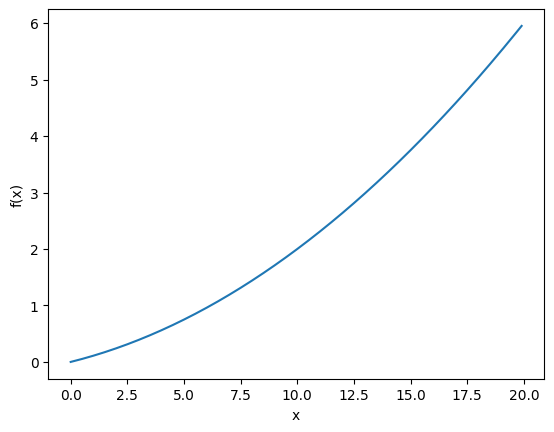

In [73]:
# numerical differential example
def function_1(x):
    return 0.01 * x ** 2  + 0.1 * x

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y);

In [74]:
print('bad_numerical_diff')
print(bad_numerical_diff(function_1, 5))
print(bad_numerical_diff(function_1, 10))
print()

print('good_numerical_diff')
print(good_numerical_diff(function_1, 5))
print(good_numerical_diff(function_1, 10))

bad_numerical_diff
0.0
0.0

good_numerical_diff
0.1999999999990898
0.2999999999986347


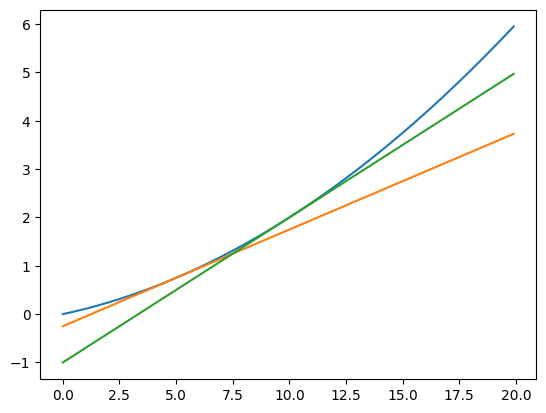

In [75]:
def tangent_line(f, x):
    d = good_numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

tf_5 = tangent_line(function_1, 5)
tf_10 = tangent_line(function_1, 10)
y2 = tf_5(x)
y3 = tf_10(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3);

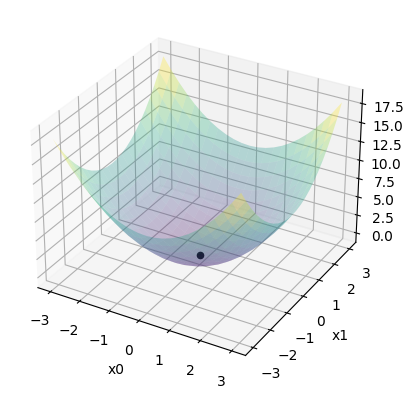

In [76]:
# x0^2 + x1^2 graph
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x0, x1):
    return x0**2 + x1**2

# data
x0 = np.linspace(3, -3, 23)
x1 = np.linspace(3, -3, 23)
x0, x1 = np.meshgrid(x0, x1)
y = f(x0, x1)

# generate 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x0, x1, y, cmap = 'viridis', alpha = 0.3)

# x0=0, x1=0 point
ax.scatter(0, 0, f(0, 0), color='black', label='Point (0, 0)')

ax.set_xlabel('x0')
ax.set_ylabel('x1');

In [77]:
# partial derivative example
def function_2(x):
    return x[0]**2 + x[1] ** 2

# x0 = 3, x1 = 4 partial derivative to x0
def function_tmp1(x0):
    return x0 * x0 + 4.0 **2

good_numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [78]:
# x0 = 3, x1 = 4 partial derivative to x1
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1

good_numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [79]:
# gradient

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    
    return grad

In [80]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


No handles with labels found to put in legend.


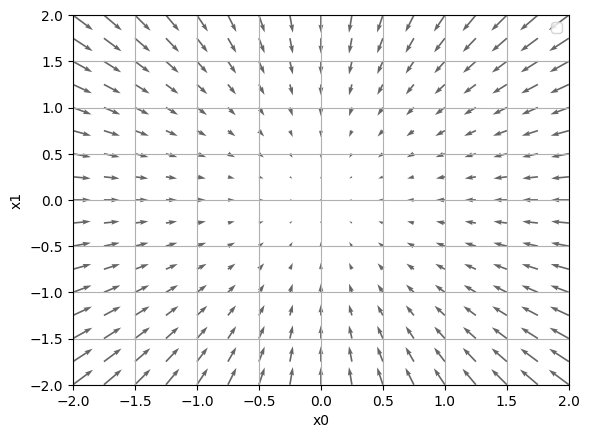

In [81]:
# x0^2 + x1^2 gradient
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

In [82]:
# gradient descent method
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [83]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

[[-3.          4.        ]
 [-2.4         3.2       ]
 [-1.92        2.56      ]
 [-1.536       2.048     ]
 [-1.2288      1.6384    ]
 [-0.98304     1.31072   ]
 [-0.786432    1.048576  ]
 [-0.6291456   0.8388608 ]
 [-0.50331648  0.67108864]
 [-0.40265318  0.53687091]
 [-0.32212255  0.42949673]
 [-0.25769804  0.34359738]
 [-0.20615843  0.27487791]
 [-0.16492674  0.21990233]
 [-0.1319414   0.17592186]
 [-0.10555312  0.14073749]
 [-0.08444249  0.11258999]
 [-0.06755399  0.09007199]
 [-0.0540432   0.07205759]
 [-0.04323456  0.05764608]]


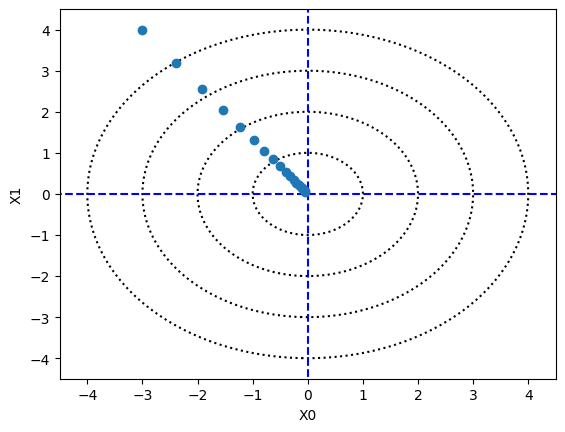

In [84]:
# lr= 0.1, init_x = -3, 4
import numpy as np
import matplotlib.pylab as plt
from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)
print(x_history)

# make Contour Plot of f(x) = x0² + x1²
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

x0 = np.linspace(-5, 5, 1000)
x1 = np.linspace(-5, 5, 1000)
x0, x1 = np.meshgrid(x0, x1)
y = x0**2 + x1**2

plt.contour(x0, x1, y, levels=[1,4,9,16], colors='k', linestyles='dotted')


plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

[[-3.00000000e+00  4.00000000e+00]
 [ 5.70000000e+01 -7.60000000e+01]
 [-1.08300000e+03  1.44400000e+03]
 [ 2.05770000e+04 -2.74360000e+04]
 [-3.90963008e+05  5.21284002e+05]
 [ 7.42829664e+06 -9.90439654e+06]
 [-1.41137328e+08  1.88183103e+08]
 [ 2.68126267e+09 -3.57501690e+09]
 [-5.09763373e+10  6.79001831e+10]
 [ 9.45170863e+11 -1.29524862e+12]
 [-2.58983747e+13 -1.29524862e+12]
 [-2.58983747e+13 -1.29524862e+12]
 [-2.58983747e+13 -1.29524862e+12]
 [-2.58983747e+13 -1.29524862e+12]
 [-2.58983747e+13 -1.29524862e+12]
 [-2.58983747e+13 -1.29524862e+12]
 [-2.58983747e+13 -1.29524862e+12]
 [-2.58983747e+13 -1.29524862e+12]
 [-2.58983747e+13 -1.29524862e+12]
 [-2.58983747e+13 -1.29524862e+12]]


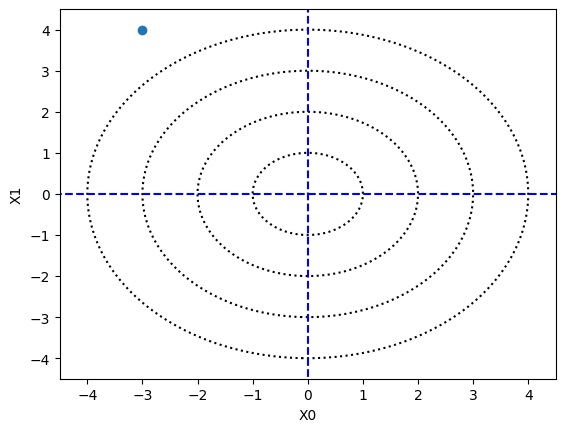

In [85]:
# lr= 10, init_x = -3, 4
import numpy as np
import matplotlib.pylab as plt
from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 10
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)
print(x_history)

# make Contour Plot of f(x) = x0² + x1²
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

x0 = np.linspace(-5, 5, 1000)
x1 = np.linspace(-5, 5, 1000)
x0, x1 = np.meshgrid(x0, x1)
y = x0**2 + x1**2

plt.contour(x0, x1, y, levels=[1,4,9,16], colors='k', linestyles='dotted')


plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

[[-3.          4.        ]
 [-2.94        3.92      ]
 [-2.8812      3.8416    ]
 [-2.823576    3.764768  ]
 [-2.76710448  3.68947264]
 [-2.71176239  3.61568319]
 [-2.65752714  3.54336952]
 [-2.6043766   3.47250213]
 [-2.55228907  3.40305209]
 [-2.50124329  3.33499105]
 [-2.45121842  3.26829123]
 [-2.40219405  3.2029254 ]
 [-2.35415017  3.13886689]
 [-2.30706717  3.07608956]
 [-2.26092582  3.01456777]
 [-2.21570731  2.95427641]
 [-2.17139316  2.89519088]
 [-2.1279653   2.83728706]
 [-2.08540599  2.78054132]
 [-2.04369787  2.7249305 ]]


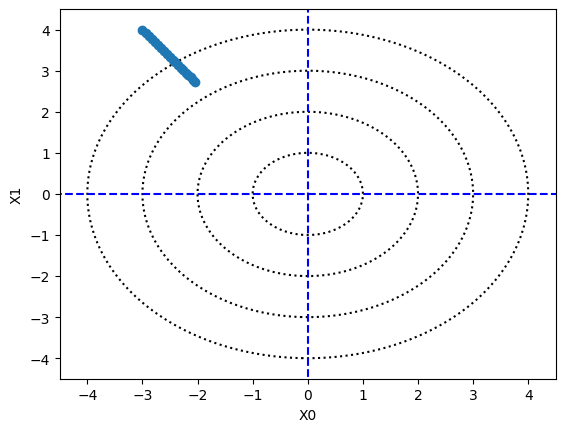

In [86]:
# lr= 1e-2, init_x = -3, 4
import numpy as np
import matplotlib.pylab as plt
from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 1e-2
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)
print(x_history)

# make Contour Plot of f(x) = x0² + x1²
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

x0 = np.linspace(-5, 5, 1000)
x1 = np.linspace(-5, 5, 1000)
x0, x1 = np.meshgrid(x0, x1)
y = x0**2 + x1**2

plt.contour(x0, x1, y, levels=[1,4,9,16], colors='k', linestyles='dotted')


plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [87]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss


In [88]:
net = simpleNet()
print("Weights")
print(f'{net.W}\n')


x = np.array([0.6, 0.9])
p = net.predict(x)
print("Prediction")
print(f'{p}\n')

# answer label
t = np.array([0, 0, 1])
print("net loss")
print(net.loss(x, t))

Weights
[[ 1.31005477 -0.8386021  -1.0389203 ]
 [-1.02460966  0.64489866 -0.01710691]]

Prediction
[-0.13611583  0.07724754 -0.6387484 ]

net loss
1.5474111624679943


In [89]:
# numerical gradient of upper function
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.21106162  0.26125932 -0.47232094]
 [ 0.31659243  0.39188898 -0.70848141]]


In [90]:
# implement training alogorithm
# SGD stochastic gradient descent (확률적 경사 하강법)
import sys, os
sys.path.append(os.pardir)  
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [94]:
# class test
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)  # (784, 100)
print(net.params['b1'].shape)  # (100,)
print(net.params['W2'].shape)  # (100, 10)
print(net.params['b2'].shape)  # (10,)

x = np.random.rand(100, 784)  # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10)   # 더미 정답 레이블(100장 분량)

grads = net.numerical_gradient(x, t)  # 기울기 계산
print(grads['W1'].shape)  # (784, 100)
print(grads['b1'].shape)  # (100,)
print(grads['W2'].shape)  # (100, 10)
print(grads['b2'].shape)  # (10,)
print(grads['W1'])
print(grads['b1'])
print(grads['W2'])
print(grads['b2'])

(784, 100)
(100,)
(100, 10)
(10,)
(784, 100)
(100,)
(100, 10)
(10,)
[[-2.73892018e-04  1.42657708e-04  1.37058651e-04 ...  7.17998194e-05
  -1.39998124e-04 -3.00258973e-05]
 [-2.24097167e-04  4.60135996e-05  8.13754264e-05 ...  7.31858663e-05
  -9.23139365e-05 -5.47608270e-05]
 [-3.40622652e-04  1.03218685e-04  2.34098343e-04 ...  8.10541567e-05
  -6.93759783e-05  5.55563373e-05]
 ...
 [-1.38139074e-04  6.16288354e-05  1.63682135e-05 ...  6.69676359e-05
  -2.20791385e-05 -7.63124497e-05]
 [-2.21684822e-04 -3.81517906e-05  2.35208382e-04 ... -3.51735419e-05
  -9.13803699e-06  1.66037317e-05]
 [-3.08874315e-04  1.08371303e-04  2.10751989e-04 ...  2.01667603e-04
  -1.85188969e-04 -7.48775997e-05]]
[-3.86621533e-04  1.06407250e-04  3.06722727e-04 -1.17073171e-04
 -6.74407374e-04 -1.08343468e-04  4.25683553e-04 -3.24987726e-05
  1.21545884e-04  2.92571074e-04 -2.79446621e-04 -2.60084765e-04
  9.53000012e-05  1.55076068e-04  2.72699399e-04  1.93878771e-04
 -2.35241109e-04 -9.46197587e-05  2.

In [92]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=False)

train_loss_list = []

# 하이퍼 파라메터
iters_num = 50  # 반복횟수
train_size = x_train.shape[0]
batch_size = 10  # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 성능 개선

    # 매개변수 갱선
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

In [93]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼 파라메터
iters_num = 50  # 반복횟수
train_size = x_train.shape[0]
batch_size = 10  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 성능 개선

    # 매개변수 갱선
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭 당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | "
              + str(train_acc) + ", " + str(test_acc))

print(train_loss_list)

train acc, test acc | 0.10218333333333333, 0.101
[2.2290497846678816, 2.22668201740929, 1.9931365378308754, 2.1573249093577846, 2.295406679719695, 2.2644551040952448, 2.213286698095303, 2.2071989831746635, 2.1411824896903076, 2.2316334573254375, 2.148139300316683, 2.3027705250101733, 2.2406849234351087, 2.3009334873957186, 2.287458746874001, 2.2998283056653195, 2.2184612532956427, 2.2251476361079794, 2.2388169561178675, 2.148958635249627, 2.195031764182193, 2.149248607340559, 2.2833833800444796, 2.2631440220554486, 2.18403811677312, 2.27800995629999, 2.3120792655032987, 2.265270355349702, 2.195583238970264, 2.18849370959867, 2.2620256172526707, 2.1158153308489682, 2.250006652754368, 2.0309543854798022, 2.184523953192052, 2.3049046017581793, 2.3167078992252828, 2.2360572720425145, 2.1888662949447726, 2.1552015057902283, 2.2247226206338153, 2.259701061830085, 2.2295657720627164, 2.145937487591727, 2.1070355751955687, 2.258560382749676, 2.121410000101999, 2.203969288210369, 2.247032629167